## 1. Load data from file

In [0]:
import numpy as np

DATA_PATH = './data-nonlinear.txt'

# load data from file
data = np.genfromtxt(DATA_PATH, delimiter=',')

# separate features from labels
X_raw = data[:, 0:-1]
Y_raw = data[:, -1].reshape(-1, 1)

## 2. Precompute X data

In [0]:
X_data = np.zeros((X_raw.shape[0], 1))

for i in range(10):
  for j in range(10):
    new_column = ((X_raw[:, 0] ** i) * (X_raw[:, 1] ** j)).reshape(-1, 1)
    X_data = np.concatenate((X_data, new_column), axis=1)

X_data = X_data[:, 1:]
Y_data = Y_raw

## 3. Define functions for logistic regression

In [0]:
def logistic(theta, X):
  z = np.matmul(X, theta.T)
  Y_hat = 1 / (1 + np.exp(-z))
  return Y_hat

def objective(Y_hat, Y, lam=0, theta=None):
  epsilon = 1e-8
  data_fidelity_term = -1 * np.mean(
      Y * np.log(Y_hat + epsilon) + (1 - Y) * np.log(1 - Y_hat + epsilon), axis=0
  )

  regular_term = 0
  if lam is not 0:
    regular_term = (lam / 2) * np.sum(theta ** 2)

  return data_fidelity_term + regular_term

def gradient(X, Y_hat, Y, lam=0, theta=None):
  m = len(X)

  if lam is 0:
    return (1 / m) * np.matmul((Y_hat - Y).T, X)
  else:
    return (1 / m) * np.matmul((Y_hat - Y).T, X) + lam * theta

def accuracy(Y_hat, Y):
  answer = (Y_hat >= 0.5).astype('float64')
  return np.mean(answer == Y)

## 4. Learning with the gradient descent algorithm


In [0]:
def fit_logistic_regression_model(X_train, Y_train, lr, lam, epoch_count):
  """
  :param X_train: Feature data for learning
  :param Y_train: label data for learning
  :param lr: learning rate
  :param lam: lambda value which is control parameter for regularization
  :param epoch_count: num of epoch
  :return: (learning history, final theta)
  """

  theta = np.sqrt(1 / X_train.shape[0]) * np.random.randn(1, X_train.shape[1]) # xavier initialization
  history = {
    'theta': np.zeros((epoch_count, theta.shape[1])),
    'train_err': np.zeros(epoch_count),
    'train_acc': np.zeros(epoch_count)
  }

  for epoch in range(epoch_count):
    # calculate training error
    Y_hat = logistic(theta, X_train)
    train_err = objective(Y_hat, Y_train, lam, theta)
    train_acc = accuracy(Y_hat, Y_train)

    # log history
    history['theta'][epoch] = np.squeeze(theta)
    history['train_err'][epoch] = train_err
    history['train_acc'][epoch] = train_acc

    # gradient descent
    grad_theta = gradient(X_train, Y_hat, Y_train, lam, theta)
    theta -= lr * grad_theta

  return history, theta

lr = 0.7
epoch_count = 200000

# over-fitting
over_fitting_lam = 0.000001
history, over_fitting_theta = fit_logistic_regression_model(X_data, Y_data, lr, over_fitting_lam, epoch_count)

# just-right
just_right_lam = 0.001
just_right_history, just_right_theta = fit_logistic_regression_model(X_data, Y_data, lr, just_right_lam, epoch_count)

# under-fitting
under_fitting_lam = 0.1
under_fitting_history, under_fitting_theta = fit_logistic_regression_model(X_data, Y_data, lr, under_fitting_lam, epoch_count)

## 5. Results


### 5-1. Plot the training data

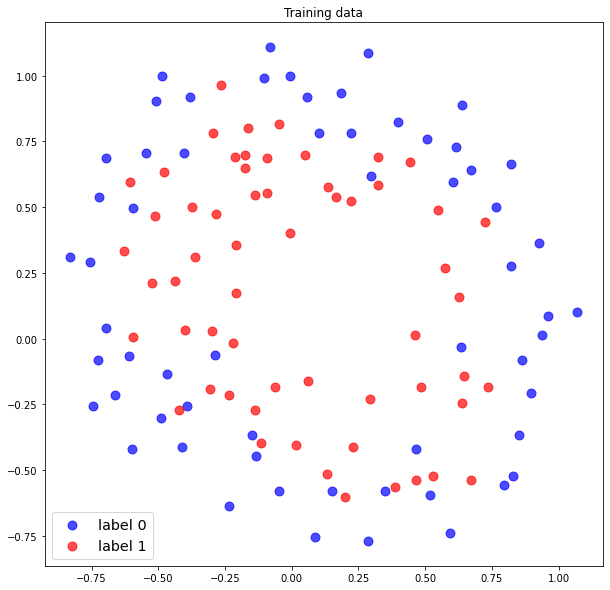

In [142]:
import matplotlib.pyplot as plt

X_label0 = X_raw[np.squeeze(Y_raw) == 0]
X_label1 = X_raw[np.squeeze(Y_raw) == 1]

plt.figure(figsize=(10, 10))
plt.title('Training data')
plt.scatter(X_label0[:, 0], X_label0[:, 1], alpha=0.7, c='b', s=80)
plt.scatter(X_label1[:, 0], X_label1[:, 1], alpha=0.7, c='r', s=80)
plt.legend(['label 0', 'label 1'], fontsize='x-large', loc='lower left')
plt.show()